# COGS 108 - Final Project 

# Overview

My project analyzes the relationship between number of violations found through health inspections in North Carolina and the weather of the months in which the violations occur. My main aim was to find whether there are any particular differences between the months of January (coldest month in North Carolina) and July (hottest month in North Carolina). I further looked at how this relationship affects Mobile Food Units in particular. No significant relationship was found between violations and the months mentioned, similarly no affect was seen for Mobile Food Units.

# Name & PID

- Name: Sama Ailani
- PID: A14585829

# Research Question

*How do the number of different types of violations during health inspections change through the year (with weather) in North Carolina? And how does it affect different facility types?*

## Background and Prior Work

Based on the North Carolina's Environmental Health department, during a health inspection of a food facility, the food violations are categorized centered on the major category it belongs to. This results in seven major categories, and the subcategory codes start with the number of their category<sup>1</sup>.

The categories are numbered as follows:
(2) Management & Personnel
(3) Food
(4) Equipment, Utensils, and Linens
(5) Water, Plumbing, and Waste
(6) Physical Facilities
(7) Poisonous or Toxic Materials
(8) Compliance & Enforcement 

"Using a standardized inspection form, the specialist marks the violations and determines if the full point value or half of the point value will be deducted. Factors that influence a decision to deduct the full point value is the severity of the violation or if it has been deducted on previous inspections. If there is a potential for a violation or the violation is minor, the specialist may make a general comment, to remind the operator to keep the condition under control or take preventive steps to keep the condition from progressing to a violation<sup>2</sup>." 

After completion of the health inspection, the point acquired for any violations are added up and subtracted from 100 to get the inspection score. Based on the score, the facility is assigned a grade, A for scores 90 to 100, B for 80 to 89 and C for any score less than or equal to 79, which is the failing grade<sup>2</sup>. 

Weather can be an important factor affecting violation rates as food handling practices need to change as temperature and humidity changes. The study by Dominianni and colleagues looked at how the relationship between temperature related food violations and the maximum temperature for that day (+/-3 days). They examined the data collected from New York restaurant inspections from 2012 to 2015 and maximum and median temperatures associated with the days of inspection. Through their study they found that "Violations for cold food holding and insufficient refrigerated or hot holding equipment were more likely to be cited on hot days compared with cool days"<sup>3</sup>.

Here is the temperature trend through the months in Raleigh, North Carolina:

![title](img/temp.png)


My study looks at how certain violations are affected through the year, particular analysis was done to find the difference in the hottest and coldest months in North Carolina. It also looks at whether certain facility types, particularly Mobile Food facilities, are impacted more with the relationship between violations and climate.

References (include links):
- 1) North Carolina Food Code Manual. Retrieved from: http://www.wakegov.com/food/healthinspections/rules/Documents/NC%20Food%20Code%20Manual%202009%20FINAL.pdf
- 2) About the Inspection Process. Retrieved from https://www.forsyth.cc/PublicHealth/EnvironmentalHealth/aboutInspections.aspx
- 3) Dominianni, Lane, Ahmed, Johnson, McKelvey & Ito. (2018, July 1). Hot Weather Impacts on New York City Restaurant Food Safety Violations and Operations. Retrieved from https://meridian.allenpress.com/jfp/article/81/7/1048/174779/Hot-Weather-Impacts-on-New-York-City-Restaurant

# Hypothesis


*I hypothesize that during the hotter months (July, August), the violations, specially in the 'Food' category would increase compared to the colder months (December, January) as higher temperatures are danger zones for a lot of food products.
I hypothesize that this relationship will increase for Mobile Food Facilities as they can have a harder time maintaining temperatures*

# Dataset(s)

As I was provided with all the data used in this project, I cannot account for how reliable it is.

- Dataset Name: Violations 
- Number of observations: 189802
- Description: This dataset includes data about violations that occured during the inspections within the date range of September 2012 to November 2016. The variables available include (but are not limited to), facility ID (hsisid), date of inspection, category of violation.


- Dataset Name: Inspections
- Number of observations: 18466
- Description: This dataset includes data about inspections that took place within the date range of September 2012 to November 2016. The variables available include (but are not limited to), facility ID (hsisid), date, facility type, etc.


- Dataset Name: Restaurants
- Number of observations: 3324
- Description: This dataset includes data about some of the restaurants in state of North Carolina. The variables available include (but are not limited to), facility ID (hsisid), facility type, location, etc 

In order to figure out the violations that occured for different facility types, I had to combine violation and restaurant data based on the hsisid.

# Setup

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import requests
from bs4 import BeautifulSoup
from scipy.stats import chisquare

In [12]:
#Setting the common figure size
plt.rcParams['figure.figsize'] = (17, 7)

# Loading Data

In [13]:
# Importing all the required data
inspections_filepath = 'data/data/inspections.csv'
df_inspections = pd.read_csv(inspections_filepath)

violations_filepath = 'data/data/violations.csv'
df_violations = pd.read_csv(violations_filepath)

In [85]:
restaurants_filepath = 'data/data/restaurants.csv'
df_restaurants = pd.read_csv(restaurants_filepath)

In [14]:
df_violations.head()

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


In [15]:
# a gist of the main dataset we will be using
df_violations.columns

Index(['X.objectid', 'hsisid', 'inspectdate', 'category', 'statecode',
       'critical', 'questionno', 'violationcode', 'severity', 'shortdesc',
       'inspectedby', 'comments', 'pointvalue', 'observationtype',
       'violationtype', 'count', 'cdcriskfactor', 'cdcdataitem'],
      dtype='object')

# Data Cleaning

In [16]:
# function to extract the month from the date as I am particularly interested in month averages

def month(string):
    month = string[5:7]
    return month


df_inspections['month'] = df_inspections['date'].apply(month)
df_violations['month'] = df_violations['inspectdate'].apply(month)
df_violations['month'].unique()

array(['09', '10', '07', '08', '11', '12', '01', '04', '02', '03', '05',
       '06'], dtype=object)

As mentioned in the background, the subcategory codes start with the code for the major category. For ease, I will only be analyzing the violations based on the 7 major categories instead of the subcategories. To get the code numbers from the subcategory codes, I have created the following function:

In [17]:
def subcode_to_code(subcode):
    code = subcode[0]
    return code

In [18]:
# Applying the above function to the violationcode column in violation dataset

df_violations['subcode_to_code'] = df_violations['violationcode'].apply(subcode_to_code)
df_violations['subcode_to_code'].unique()

array(['7', '3', '2', '6', '4', '8', '5'], dtype=object)

In [19]:
# Creating subdatasets for each of the violation category for ease

violation_2 = df_violations[df_violations['subcode_to_code'] == '2']

violation_3 = df_violations[df_violations['subcode_to_code'] == '3']

violation_4 = df_violations[df_violations['subcode_to_code'] == '4']

violation_5 = df_violations[df_violations['subcode_to_code'] == '5']

violation_6 = df_violations[df_violations['subcode_to_code'] == '6']

violation_7 = df_violations[df_violations['subcode_to_code'] == '7']

violation_8 = df_violations[df_violations['subcode_to_code'] == '8']

In [86]:
# This merge was created to look at the second part of the question
# that analysis how the relationship of facility type with its violatons through the year
# as the violation dataset does not contain data about the facility type, the merge was required

df = pd.merge(df_violations, df_restaurants, on = 'hsisid')

# Data Analysis & Results

## Part I

In order to look at the trend in violations, I needed to make sure that there aren't differences in the number of inspections already, which is done below:

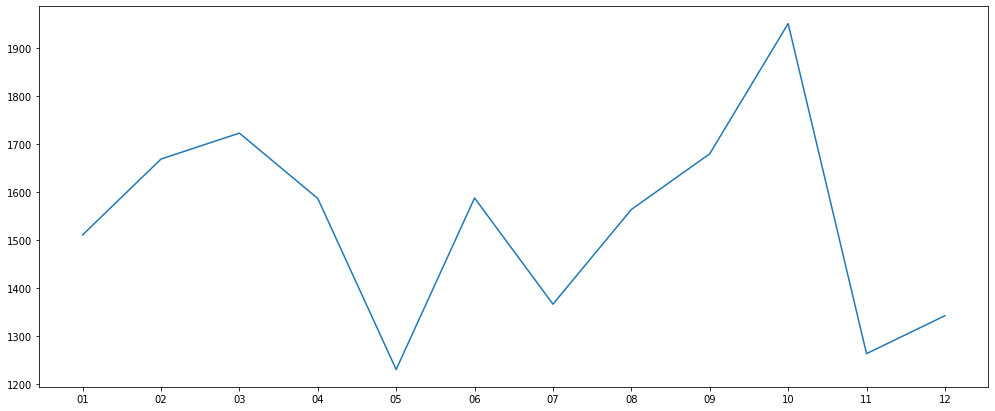

In [20]:
inspect_count = df_inspections['month'].value_counts().sort_index()

month_dict = inspect_count.to_dict()
month_list = sorted(month_dict.items())
month_x, month_y = zip(*month_list)
plt.plot(x,y)

As seen above, the number of inspections is not the same in every month. This differences and why they occur could be due to the data provided, if not, we should look more into it. But for answering my question, this is not particularly required. 

But I will have to make the violations proportionate based on the number of inspections conducted in that month. 
If I do not do so, the violations will mainly become a function of the inspections conducted in that month

The function below takes in violation_count (or the count that we want to make proportional) and inspection_count (or the count that we want to makes the first one proportional to)

In [27]:
def prop_month(violation_count,inspection_count):
        
    propdict = dict()
    inspect_prop = []
    months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
    
# to make the violation proportionate based on number of inspection in that month

    for i in range(len(violation_count)):
        key = violation_count[i]/inspection_count[i]
        propdict.update({months[i]:key})
        
    proplist = propdict.items()
    return proplist, propdict

In [28]:
# raw value counts called count_n & proportionate lists called count_n_list of violations per month

count_2 = violation_2.month.value_counts().sort_index()
count_2_list, count_2_dict = prop_month(count_2,inspect_count)

count_3 = violation_3.month.value_counts().sort_index()
count_3_list, count_3_dict = prop_month(count_3,inspect_count)

count_4 = violation_4.month.value_counts().sort_index()
count_4_list, count_4_dict = prop_month(count_4,inspect_count)

count_5 = violation_5.month.value_counts().sort_index()
count_5_list, count_5_dict = prop_month(count_5,inspect_count)

count_6 = violation_6.month.value_counts().sort_index()
count_6_list, count_6_dict = prop_month(count_6,inspect_count)

count_7 = violation_7.month.value_counts().sort_index()
count_7_list, count_7_dict = prop_month(count_7,inspect_count)

count_8 = violation_8.month.value_counts().sort_index()
count_8_list, count_8_dict = prop_month(count_8,inspect_count)

In [29]:
months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

inspect_count_list = df_inspections['month'].value_counts().sort_index()
inspect_count_list
inspect_count_dict = dict()

for i in range(len(months)):
    inspect_count_dict.update({months[i]: inspect_count_list[i]})

The following are the list of graphs and the chisquare analyses comparing the hottest and the coldest months for the frequency with which violations occur in these months. I have also plotted the inspection rates on each of the graphs to see whether the reason behind the differences in inspection rates is because more violations tend to occur in those months.

Due to the different scales for inspections (raw data) and violations (proportional to inspections in that month) I created two scales for the y-axis for each of the graph. The x-axis includes the months in order. For consistency, the inspections are in blue while the violations are in red.

In [107]:
# for the chisquare analysis and rejecting the null hypothesis or alternative hypothesis based on p-value

def chi(freq_1,freq_2 = None):
    if freq_2 == None:
        stat,p_value = chisquare(freq_1)
        if p_value > 0.01:
            print('No difference found in the number of violations',
                  'Unable to reject null hypothesis based on the p-value:',p_value)
        else:
            print('Differences found in the number of violations'
                'Reject the null hypothesis based on the p-value:', p_value)
    else:
        stat, p_value = chisquare([freq_1,freq_2])
        if p_value > 0.01:
            print('No differences found in the number of violations for the two frequencies mentioned',
                  'Unable to reject null hypothesis based on the p-value:',p_value)
        else:
            print('Differences found in the number of violations for the two frequencies mentioned'
                'Reject the null hypothesis based on the p-value:', p_value)

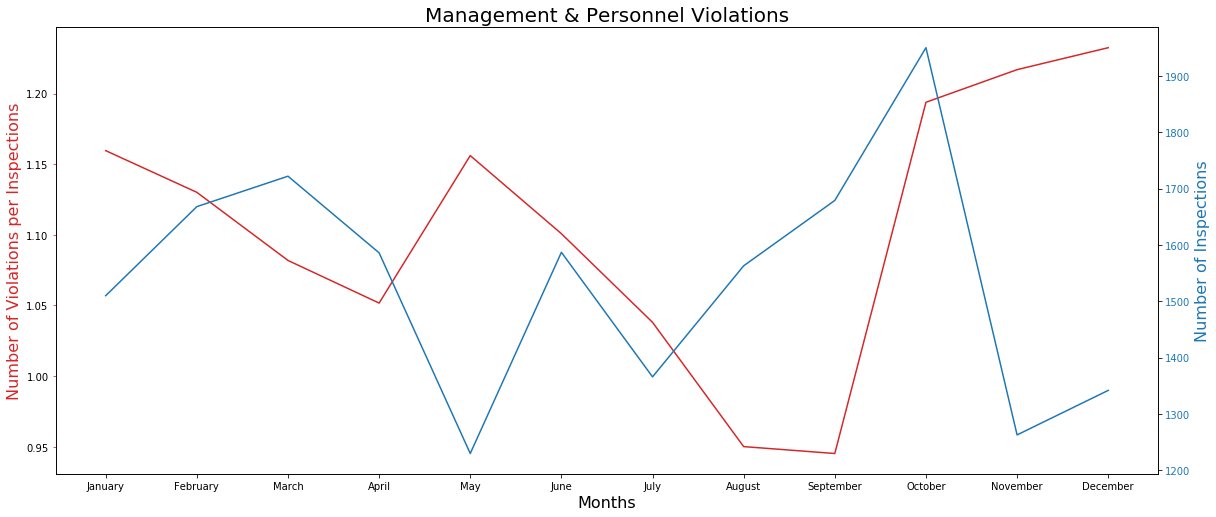

In [108]:
x,vio_y = zip(*count_2_list)
inspect_count_list = inspect_count_dict.items()
x, insp_y = zip(*inspect_count_list)
fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('Months', size = 16)
ax1.set_ylabel('Number of Violations per Inspections', color = color, size = 16)
ax1.plot(x,vio_y, color=color)
ax1.tick_params(axis='y',color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Inspections', color=color, size = 16)
ax2.plot(x, insp_y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Management & Personnel Violations', fontsize = 20)
plt.show()


In [109]:
chi(vio_y)
chi(vio_y[0],vio_y[6])

No difference found in the number of violations Unable to reject null hypothesis based on the p-value: 0.999999999862685
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.9346606240884803


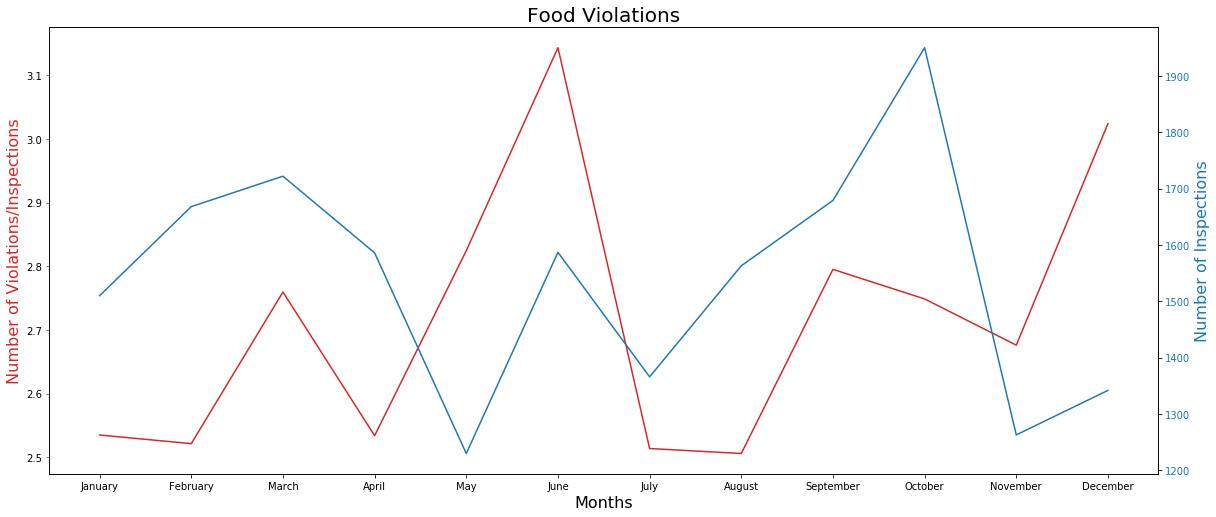

In [110]:
x,vio_y = zip(*count_3_list)
inspect_count_list = inspect_count_dict.items()
x, insp_y = zip(*inspect_count_list)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months', size = 16)
ax1.set_ylabel('Number of Violations/Inspections', color = color, size = 16)
ax1.plot(x,vio_y, color=color)
ax1.tick_params(axis='y',color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Inspections', color=color, size = 16)
ax2.plot(x, insp_y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Food Violations', fontsize = 20)
plt.show()

In [111]:
chi(vio_y)
chi(vio_y[0],vio_y[6])

No difference found in the number of violations Unable to reject null hypothesis based on the p-value: 0.9999999943290833
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.9924757388836971


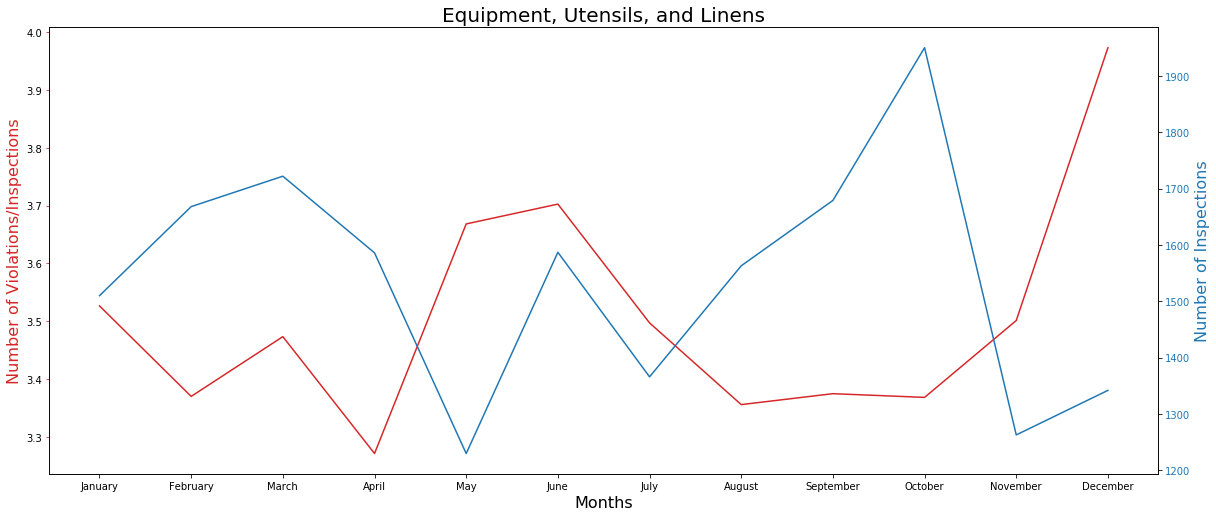

In [112]:
x,vio_y = zip(*count_4_list)
inspect_count_list = inspect_count_dict.items()
x, insp_y = zip(*inspect_count_list)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months', size = 16)
ax1.set_ylabel('Number of Violations/Inspections', color = color, size = 16)
ax1.plot(x,vio_y, color=color)
ax1.tick_params(axis='y',color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Inspections', color=color, size = 16)
ax2.plot(x, insp_y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Equipment, Utensils, and Linens', fontsize = 20)
plt.show()
#x, y = zip(*inspect_count_list)
#plt.plot(x,y)

In [113]:
chi(vio_y)
chi(vio_y[0],vio_y[6])

No difference found in the number of violations Unable to reject null hypothesis based on the p-value: 0.9999999993989143
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.9911433320257315


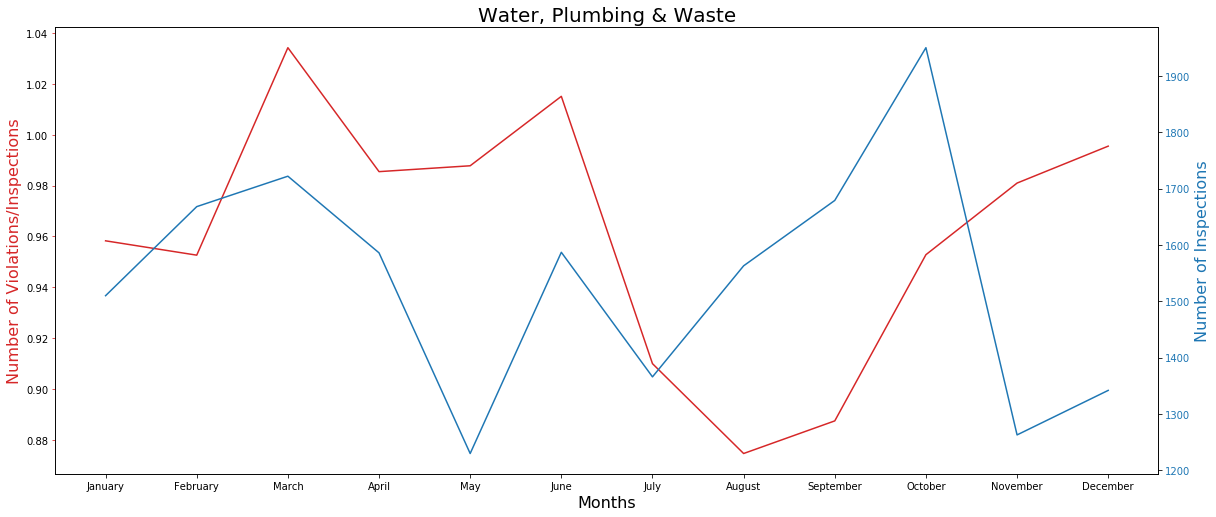

In [114]:
x,vio_y = zip(*count_5_list)
inspect_count_list = inspect_count_dict.items()
x, insp_y = zip(*inspect_count_list)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months', size = 16)
ax1.set_ylabel('Number of Violations/Inspections', color = color, size = 16)
ax1.plot(x,vio_y, color=color)
ax1.tick_params(axis='y',color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Inspections', color=color, size = 16)
ax2.plot(x, insp_y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Water, Plumbing & Waste', fontsize = 20)
plt.show()
#x, y = zip(*inspect_count_list)
#plt.plot(x,y)

In [115]:
chi(vio_y)
chi(vio_y[0],vio_y[6])

No difference found in the number of violations Unable to reject null hypothesis based on the p-value: 0.9999999999997852
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.9717980287118249


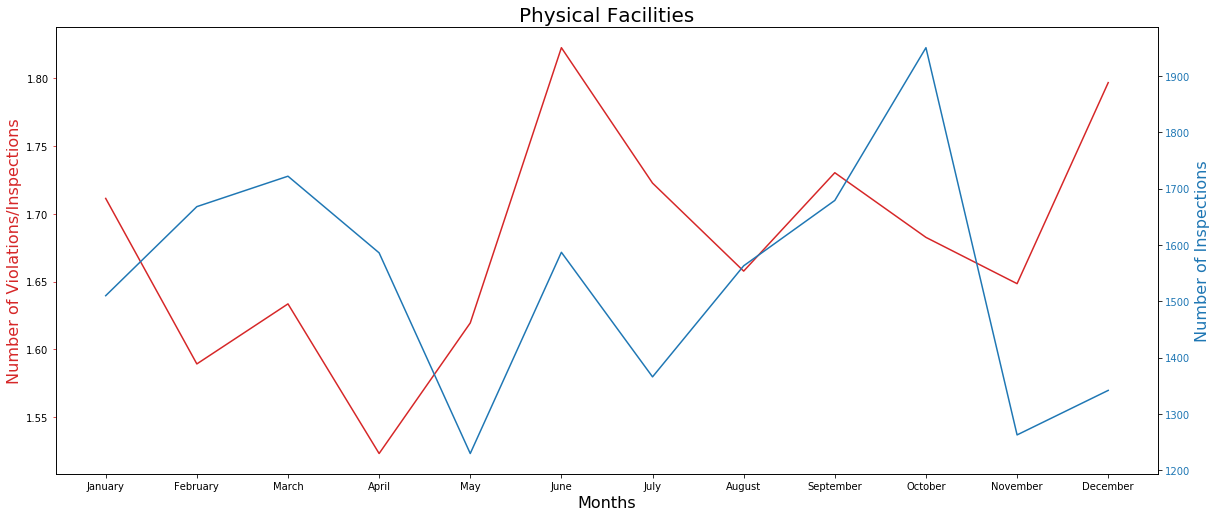

In [116]:
x,vio_y = zip(*count_6_list)
inspect_count_list = inspect_count_dict.items()
x, insp_y = zip(*inspect_count_list)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months', size = 16)
ax1.set_ylabel('Number of Violations/Inspections', color = color, size = 16)
ax1.plot(x,vio_y, color=color)
ax1.tick_params(axis='y',color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Inspections', color=color, size = 16)
ax2.plot(x, insp_y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Physical Facilities', fontsize = 20)
plt.show()
#x, y = zip(*inspect_count_list)
#plt.plot(x,y)

In [117]:
chi(vio_y)
chi(vio_y[0],vio_y[6])

No difference found in the number of violations Unable to reject null hypothesis based on the p-value: 0.9999999999961765
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.9951390992628939


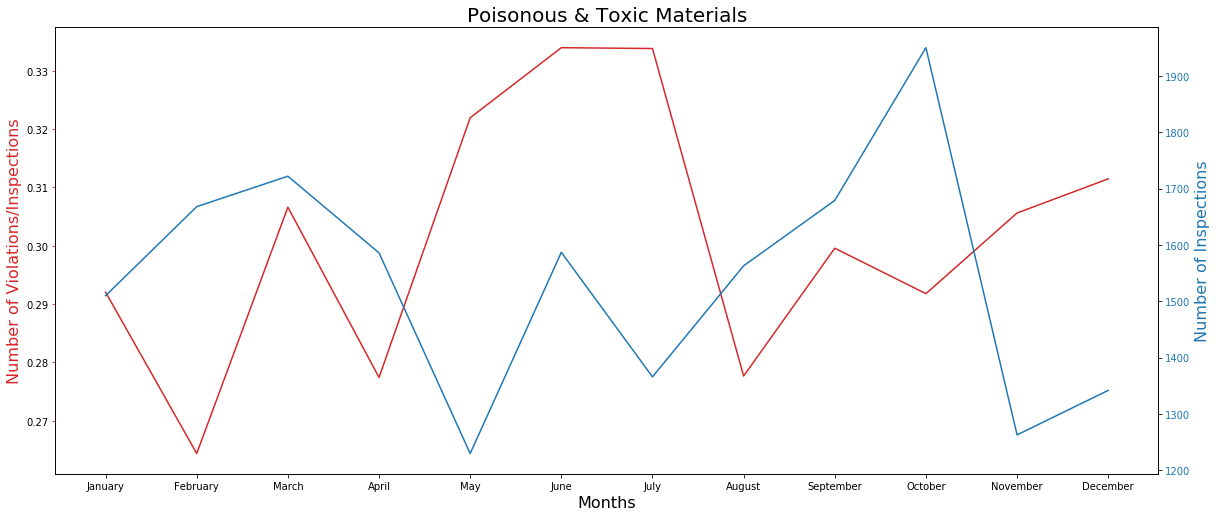

In [118]:
x,vio_y = zip(*count_7_list)
inspect_count_list = inspect_count_dict.items()
x, insp_y = zip(*inspect_count_list)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months', size = 16)
ax1.set_ylabel('Number of Violations/Inspections', color = color, size = 16)
ax1.plot(x,vio_y, color=color)
ax1.tick_params(axis='y',color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Inspections', color=color, size = 16)
ax2.plot(x, insp_y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Poisonous & Toxic Materials', fontsize = 20)
plt.show()
#x, y = zip(*inspect_count_list)
#plt.plot(x,y)

In [119]:
chi(vio_y)
chi(vio_y[0],vio_y[6])

No difference found in the number of violations Unable to reject null hypothesis based on the p-value: 0.9999999999999817
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.9578941386226997


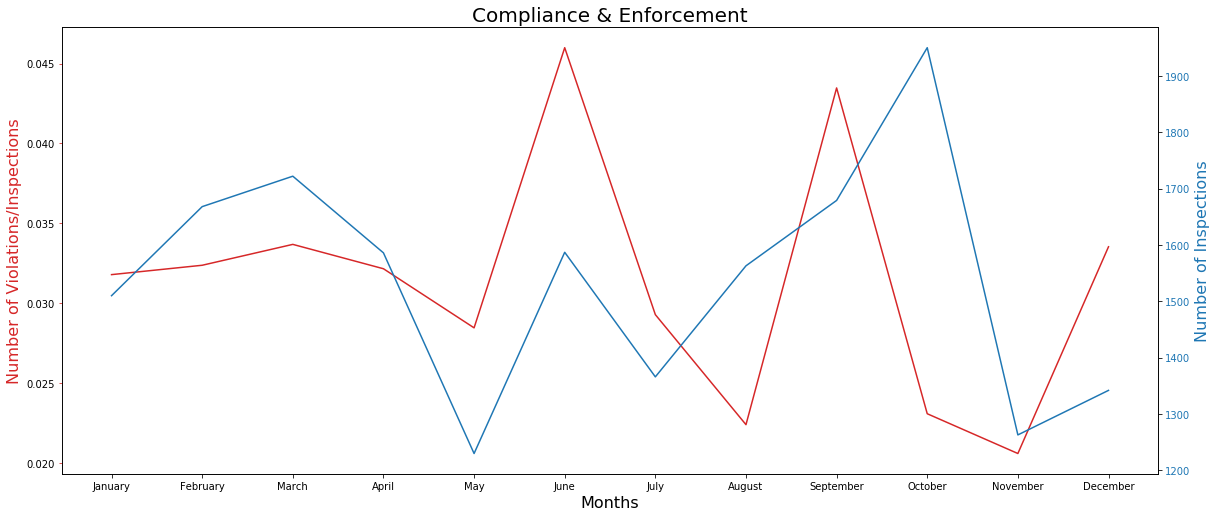

In [120]:
x,vio_y = zip(*count_8_list)
inspect_count_list = inspect_count_dict.items()
x, insp_y = zip(*inspect_count_list)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months', size = 16)
ax1.set_ylabel('Number of Violations/Inspections', color = color, size = 16)
ax1.plot(x,vio_y, color=color)
ax1.tick_params(axis='y',color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Inspections', color=color, size = 16)
ax2.plot(x, insp_y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Compliance & Enforcement', fontsize = 20)
plt.show()
#x, y = zip(*inspect_count_list)
#plt.plot(x,y)

In [121]:
chi(vio_y)
chi(vio_y[0],vio_y[6])

No difference found in the number of violations Unable to reject null hypothesis based on the p-value: 0.999999999999958
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.991910695457284


### Analysis of p-values for Part I:

None of the p-values were small enough (all p-values > 0.01) to reject the hypothesis, i.e., I did not see any significant differences between the number of violations in January (coldest month in NC) and July (hottest month in NC)

This might not mean that there are no differences. There might be certain limitations in the data or the type of analysis I used that could have led to the results.

## Part II

In [122]:
facility_type = df_inspections['facilitytype'].value_counts()
facility_type

Restaurant                           11985
Food Stand                            3253
Public School Lunchrooms              1587
Meat Market                            735
Institutional Food Service             359
Mobile Food Units                      213
Private School Lunchrooms              135
Pushcarts                              127
Elderly Nutrition Sites (catered)       69
Limited Food Service                     3
Name: facilitytype, dtype: int64

As seen above, there are differences in the number of inspections done for each type of facility. This might be due to the fact that there are more number of facilities of a particular facility type. In order to make sure that the thing weighing the inspection and violation rates is not the number of facilities, the next set of code proportionates the rates. 

In [123]:
# finding the number of inspections done for restaurants in general and dividing it by the number of unique restaurants

n_inspect_rest = len(df_inspections[df_inspections['facilitytype'] == 'Restaurant'])
n_rest = len(df_inspections[df_inspections['facilitytype'] == 'Restaurant']['hsisid'].unique())
prop_inspect_rest = n_inspect_rest/n_rest

# finding the number of violations found for restaurants in general and dividing it by the number of unique restaurants 

n_violation_rest = len(df[df['facilitytype'] == 'Restaurant'])
prop_violation_rest = n_violation_rest/n_rest

In [124]:
# finding the number of inspections done for food stands in general and dividing it by the number of unique food stands

n_inspect_foodstand = len(df_inspections[df_inspections['facilitytype'] == 'Food Stand'])
n_foodstand = len(df_inspections[df_inspections['facilitytype'] == 'Food Stand']['hsisid'].unique())
prop_inspect_foodstand = n_inspect_foodstand/n_foodstand

# finding the number of violations found for food stands in general and dividing it by the number of unique food stands

n_violation_foodstand = len(df[df['facilitytype'] == 'Food Stand'])
prop_violation_foodstand = n_violation_foodstand/n_foodstand

In [125]:
# finding the number of inspections done for public school lunchrooms in general 
# and dividing it by the number of unique public school lunchrooms

n_inspect_pubschool = len(df_inspections[df_inspections['facilitytype'] == 'Public School Lunchrooms'])
n_pubschool = len(df_inspections[df_inspections['facilitytype'] == 'Public School Lunchrooms']['hsisid'].unique())
prop_inspect_pubschool = n_inspect_pubschool/n_pubschool

# finding the number of violations found for public school lunchrooms in general 
# and dividing it by the number of unique public school lunchrooms

n_violation_pubschool = len(df[df['facilitytype'] == 'Public School Lunchrooms'])
prop_violation_pubschool = n_violation_pubschool/n_pubschool

In [126]:
# finding the number of inspections done for institutional food services in general 
# and dividing it by the number of unique Institutional Food Services

n_inspect_inst = len(df_inspections[df_inspections['facilitytype'] == 'Institutional Food Service'])
n_inst = len(df_inspections[df_inspections['facilitytype'] == 'Institutional Food Service']['hsisid'].unique())
prop_inspect_inst = n_inspect_inst/n_inst

# finding the number of violations found for institutional food services in general 
# and dividing it by the number of unique institutional food services

n_violation_inst = len(df[df['facilitytype'] == 'Institutional Food Service'])
prop_violation_inst = n_violation_inst/n_inst

In [127]:
# finding the number of inspections done for meat market in general 
# and dividing it by the number of unique meat markets

n_inspect_meat = len(df_inspections[df_inspections['facilitytype'] == 'Meat Market'])
n_meat = len(df_inspections[df_inspections['facilitytype'] == 'Meat Market']['hsisid'].unique())
prop_inspect_meat = n_inspect_meat/n_meat

# finding the number of violations found for Meat Markets in general 
# and dividing it by the number of unique Meat Markets

n_violation_meat = len(df[df['facilitytype'] == 'Meat Market'])
prop_violation_meat = n_violation_meat/n_meat

In [128]:
# finding the number of inspections done for Private School Lunchrooms in general 
# and dividing it by the number of unique Private School Lunchrooms
n_inspect_privschool = len(df_inspections[df_inspections['facilitytype'] == 'Private School Lunchrooms'])
n_privschool = len(df_inspections[df_inspections['facilitytype'] == 'Private School Lunchrooms']['hsisid'].unique())
prop_inspect_privschool = n_inspect_privschool/n_privschool

# finding the number of violations found for Private School Lunchrooms in general 
# and dividing it by the number of unique Private School Lunchrooms

n_violation_privschool = len(df[df['facilitytype'] == 'Private School Lunchrooms'])
prop_violation_privschool = n_violation_privschool/n_privschool

In [129]:
# finding the number of inspections done for Elderly Nutrition Sites (catered) in general 
# and dividing it by the number of unique Elderly Nutrition Sites (catered)
n_inspect_elderly = len(df_inspections[df_inspections['facilitytype'] == 'Elderly Nutrition Sites (catered)'])
n_elderly = len(df_inspections[df_inspections['facilitytype'] == 'Elderly Nutrition Sites (catered)']['hsisid'].unique())
prop_inspect_elderly = n_inspect_elderly/n_elderly

# finding the number of violations found for Elderly Nutrition Sites (catered) in general 
# and dividing it by the number of unique Elderly Nutrition Sites (catered)

n_violation_elderly = len(df[df['facilitytype'] == 'Elderly Nutrition Sites (catered)'])
prop_violation_elderly = n_violation_elderly/n_elderly

In [130]:
# finding the number of inspections done for Mobile Food Units in general 
# and dividing it by the number of unique Mobile Food Units
n_inspect_mobile = len(df_inspections[df_inspections['facilitytype'] == 'Mobile Food Units'])
n_mobile = len(df_inspections[df_inspections['facilitytype'] == 'Mobile Food Units']['hsisid'].unique())
prop_inspect_mobile = n_inspect_mobile/n_mobile

# finding the number of violations found for Mobile Food Units in general 
# and dividing it by the number of unique Mobile Food Units

n_violation_mobile = len(df[df['facilitytype'] == 'Mobile Food Units'])
prop_violation_mobile = n_violation_mobile/n_mobile

In [131]:
# finding the number of inspections done for Pushcarts in general 
# and dividing it by the number of unique Pushcarts
n_inspect_pushcarts = len(df_inspections[df_inspections['facilitytype'] == 'Pushcarts'])
n_pushcarts = len(df_inspections[df_inspections['facilitytype'] == 'Pushcarts']['hsisid'].unique())
prop_inspect_pushcarts = n_inspect_pushcarts/n_pushcarts

# finding the number of violations found for Pushcarts in general 
# and dividing it by the number of unique Pushcarts

n_violation_pushcarts = len(df[df['facilitytype'] == 'Pushcarts'])
prop_violation_pushcarts = n_violation_pushcarts/n_pushcarts

In [132]:
# finding the number of inspections done for Limited Food Service in general 
# and dividing it by the number of unique Limited Food Service
n_inspect_limited = len(df_inspections[df_inspections['facilitytype'] == 'Limited Food Service'])
n_limited = len(df_inspections[df_inspections['facilitytype'] == 'Limited Food Service']['hsisid'].unique())
prop_inspect_limited = n_inspect_limited/n_limited

# finding the number of violations found for Limited Food Service in general 
# and dividing it by the number of unique Limited Food Service

n_violation_limited = len(df[df['facilitytype'] == 'Limited Food Service'])
prop_violation_limited = n_violation_limited/n_limited

In [133]:
# Putting all the proportions into one basket

inspect_facility = [prop_inspect_rest,prop_inspect_foodstand,prop_inspect_pubschool,prop_inspect_inst,
                prop_inspect_meat,prop_inspect_privschool,prop_inspect_elderly,prop_inspect_mobile,
                prop_inspect_pushcarts,prop_inspect_limited]

violation_facility = [prop_violation_rest,prop_violation_foodstand,prop_violation_pubschool,prop_violation_inst,
                prop_violation_meat,prop_violation_privschool,prop_violation_elderly,prop_violation_mobile,
                prop_violation_pushcarts,prop_violation_limited]

In [134]:
# then making a dictionary to have the facility type as key and the proportions as values

def prop_dict(facility,counts):
    propdict = dict()
    for i in range(len(counts)):
        propdict.update({facility[i]:counts[i]}) 
    proplist = propdict.items()
    return proplist

facility = list(df_inspections['facilitytype'].unique())

inspect_dict = prop_dict(facility,inspect_facility)
violation_dict = prop_dict(facility,violation_facility)

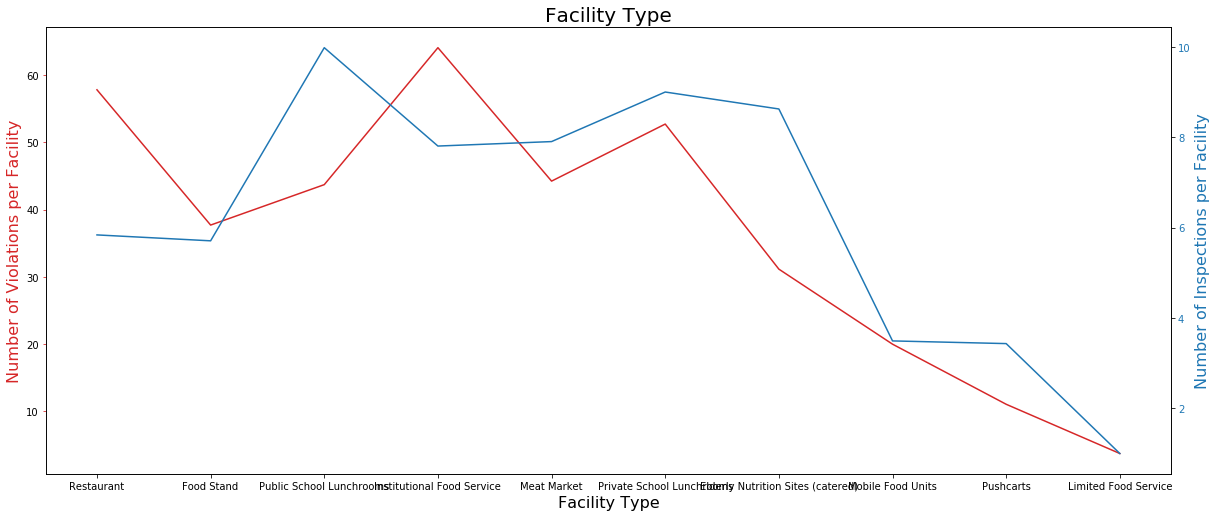

In [135]:
x,vio_y = zip(*violation_dict)
x, insp_y = zip(*inspect_dict)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Facility Type', size = 16)
ax1.set_ylabel('Number of Violations per Facility', color = color, size = 16)
ax1.plot(x,vio_y, color=color)
ax1.tick_params(axis='y',color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Inspections per Facility', color=color, size = 16)
ax2.plot(x, insp_y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Facility Type', fontsize = 20)
plt.show()


In [146]:
chi(vio_y)
print(' ')

for i in range(len(vio_y)-1):
    for j in range(len(vio_y)-1):
        print(facility[i], '&', facility[j+1],':')
        chi(vio_y[i],vio_y[j+1])
        print(' ')

Differences found in the number of violationsReject the null hypothesis based on the p-value: 2.464209945178373e-17
 
Restaurant & Food Stand :
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.03924202895322949
 
Restaurant & Public School Lunchrooms :
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.1608919213128805
 
Restaurant & Institutional Food Service :
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.5702496022878485
 
Restaurant & Meat Market :
No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.17816944262861112
 
Restaurant & Private School Lunchrooms :
No differences found in the number of violations for the two frequen

I found a bunch of differences in the number of violations from the data, where the p-value was small enough to reject the null hypothesis that there are no differences. 

Differences in the number of violations were found between:
- Restaurant & Elderly Nutrition Sites (catered)'
- Restaurant & Mobile Food Units
- Restaurant & Pushcarts
- Restaurant & Limited Food Service
- Food Stand & Institutional Food Service
- Food Stand & Pushcarts
- Food Stand & Limited Food Service
- Public School Lunchrooms & Mobile Food Units
- Public School Lunchrooms & Pushcarts
- Public School Lunchrooms & Limited Food Service
- Institutional Food Service & Food Stand
- Institutional Food Service & Elderly Nutrition Sites (catered)
- Institutional Food Service & Mobile Food Units
- Institutional Food Service & Pushcarts
- Institutional Food Service & Limited Food Service
- Meat Market & Mobile Food Units
- Meat Market & Pushcarts
- Meat Market & Limited Food Service
- Private School Lunchrooms & Mobile Food Units
- Private School Lunchrooms & Pushcarts
- Private School Lunchrooms & Limited Food Service
- Elderly Nutrition Sites (catered) & Institutional Food Service
- Elderly Nutrition Sites (catered) & Pushcarts
- Elderly Nutrition Sites (catered) & Limited Food Service
- Mobile Food Units & Limited Food Service

## Mobile Food Units

Based on my question, I wanted to look further into one of the facilities (Mobile Food Units) and how its violation rates change through the months. I also went further to look at whether 'Food' violations had differences between months (January & July)

(array([65., 24., 48., 23., 29., 28., 42.,  6., 47., 42.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

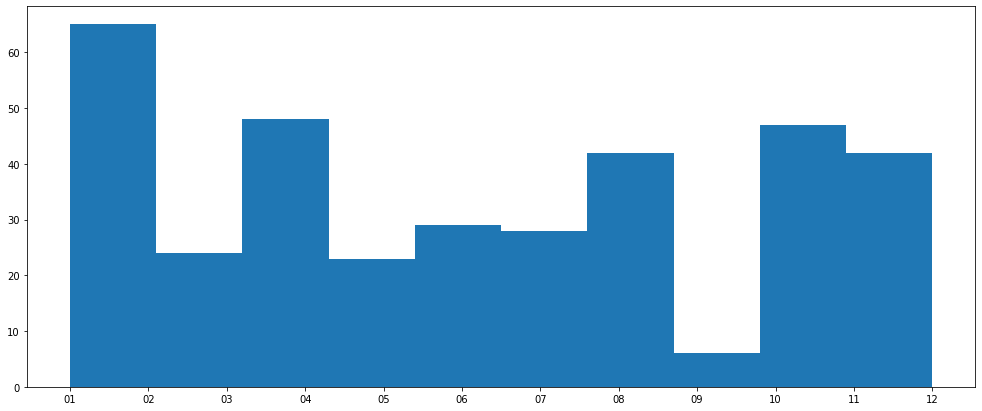

In [154]:
mobile = df[df['facilitytype'] == 'Mobile Food Units']
food_violations = mobile[mobile['subcode_to_code'] == '3']
food_violations = food_violations.sort_values(by = 'month')
plt.hist(food_violations['month'])

In [155]:
mobile_by_month = food_violations['month'].value_counts().to_dict()
mobile_by_month = mobile_by_month.items()

month, freq = zip(*mobile_by_month)
chi(freq[0],freq[6])

No differences found in the number of violations for the two frequencies mentioned Unable to reject null hypothesis based on the p-value: 0.030368472234254


### Analysis of Part II:

Even though I found differences in violations between certain types of facilities, looking at Mobile Food Units and comparing the months of January & July did not match my hypothesis. 

# Ethics & Privacy

As this project did not require any personal information about the inspectors or any information about the restaurants themselves, (other than facility type) there was no use of any personal or harmful information, which helps to keep it ethical & private. All the information about the inspections is considered public domain. That been said, there is information in the dataset itself that can be used in an unethical way, exploiting certain areas or facilities and portraying the wrong information, through wrong statistical analysis.

There is a potential that there might be biased information about the food violations as the inspectors can have biases within them and health inspection can often be subjective. Overall any biases about leniency or strictness should cancel themselves out due to large number of observations taken into account. 

# Conclusion & Discussion

To restate my question, I analyzed (using chi square analysis) whether there are differences in the number of violations for hotter vs colder months. And how does this relationship affect the facility type, Mobile Food Units. As no relationship was found between months January & July and number of violations in each of these months, this relationship did not affect Mobile Food Units.

As mentioned above, none of the analysis done supported my hypothesis. This might be due to well controlled inspections during hotter months or due to the need of bigger sample of inspections. The analysis done can also be improved by including data from the temperature & humidity to better represent weather than months. 